In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
# ... (código para ler o dataset - substitua pelo path de seu arquivo viia upload) ...

countryData = pd.read_csv("/content/countryData.csv").drop("Unnamed: 0", axis = 1)
countryData

,country,year,Access to electricity,Electricity production(coal),Energy use per capita,co2 emissions,Inflation,Exports,GDP Growth(Annual),GDP Per Capita (USD)
0,BGD,2011,59.599998,1.873032,212.058286,72.875055,NaN,NaN,NaN,NaN
1,BGD,2012,66.155571,1.927433,219.972662,71.993094,6.217504,12.532259,6.521459,883.117130
2,BGD,2013,61.500000,2.306099,222.061405,71.590639,7.530406,2.451884,6.013606,981.860851
3,BGD,2014,62.400002,1.969738,229.250540,72.052527,6.991639,3.201149,6.061059,1118.873808
4,BGD,2015,74.903740,1.689516,NaN,68.045893,6.194280,-2.829990,6.552640,1248.453310
...,...,...,...,...,...,...,...,...,...,...
103,USA,2017,100.000000,NaN,NaN,NaN,2.130110,4.077911,2.332679,60109.655726
104,USA,2018,100.000000,NaN,NaN,NaN,2.442583,2.811103,2.996464,63064.418410
105,USA,2019,100.000000,NaN,NaN,NaN,1.812210,-0.065189,2.161177,65279.529026
106,USA,2020,100.000000,NaN,NaN,NaN,1.233584,-13.562815,-3.404592,63206.521077


In [8]:
def separacaoRegiao(countryData, coluna):
    regions = ["Norte America", "Asia", "Africa", "Sul da Asia"]
    countryPerData = countryData[["country", coluna]].dropna()
    countryPerData = countryPerData.groupby("country").sum()
    countryPerData = [countryPerData[coluna].iloc[1] + countryPerData[coluna].iloc[9],
                    countryPerData[coluna].iloc[2] + countryPerData[coluna].iloc[5],
                    countryPerData[coluna].iloc[3] + countryPerData[coluna].iloc[6] + countryPerData[coluna].iloc[7],
                    countryPerData[coluna].iloc[0] + countryPerData[coluna].iloc[4] + countryPerData[coluna].iloc[8]]
    return regions, countryPerData

In [11]:
def criandoGraficoPizza(countryData, coluna, titulo):
    regions, countryPerData = separacaoRegiao(countryData, coluna)
    plt.pie(countryPerData, labels=regions, autopct='%1.1f%%',
            startangle=140, colors=sns.color_palette("pastel"))
    plt.title(titulo)
    plt.show()

In [10]:
country = []
for x in countryData.loc[:, "country"]:
  if not x in country: country.append(x)
country

['BGD', 'CAN', 'CHN', 'GHA', 'IND', 'JPN', 'KEN', 'NGA', 'PAK', 'USA']

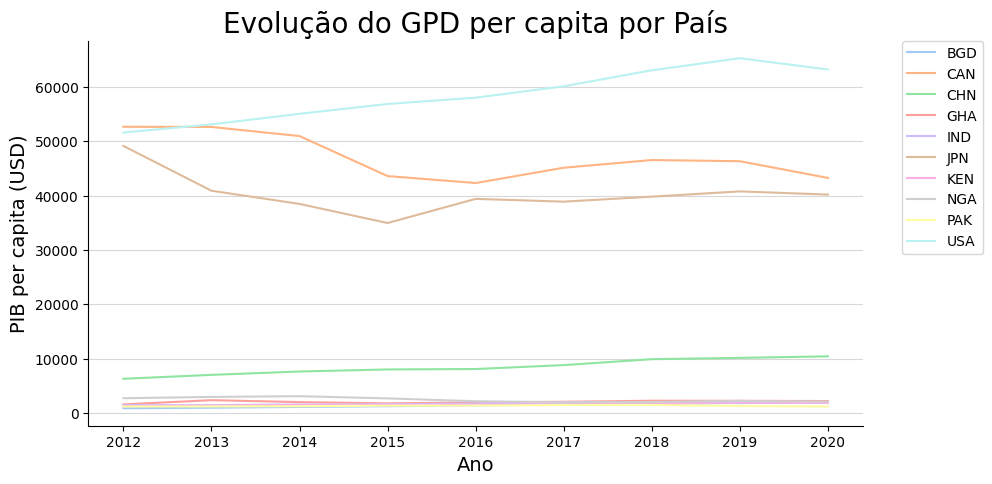

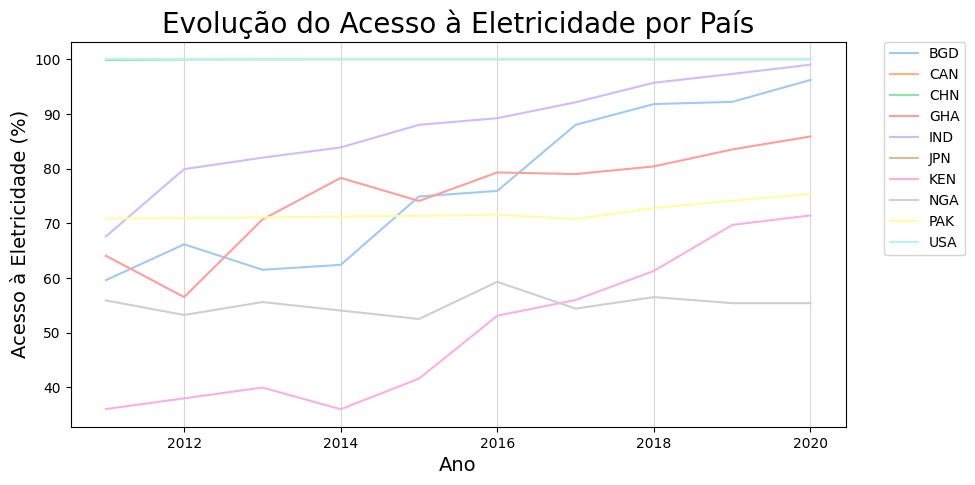

In [19]:
## 1-Gráfico de PIB per capta - Fundo Branco

# Definir uma paleta de cores pastel e facilitar a aplicação do estilo e da paleta de cores pastel.
palette = sns.color_palette("pastel")

# Criar a fura e o eixoig
plt.figure(figsize=(10, 5))  # Ajustar tamanho conforme necessário
ax = sns.lineplot(x="year", y="GDP Per Capita (USD)", hue="country", data=countryData, palette=palette)

# Personalizar o gráfico
ax.set_title("Evolução do GPD per capita por País", fontsize=20)  # Aumentar tamanho do título
ax.set_xlabel("Ano", fontsize=14)
ax.set_ylabel("PIB per capita (USD)", fontsize=14)
ax.grid(True, axis="y", alpha=0.5)  # Ajustar a aparência da grade

# Remover bordas superior e direita (opcional)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar a legenda (opcional)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)  # Mover a legenda para fora
plt.show()


## 2- Grafico Evolução temporal do acesso a eletricidade por país

palette = sns.color_palette("pastel")
plt.figure(figsize=(10, 5))
sns.lineplot(x="year", y="Access to electricity", hue="country", data=countryData, palette=palette)
plt.title("Evolução do Acesso à Eletricidade por País", fontsize=20)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Acesso à Eletricidade (%)", fontsize=14)
plt.grid(True, axis="x", alpha=0.5)  # Ajustar a aparência da grade
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)  # Mover a legenda para fora
plt.show()

